In [3]:
import pandas as pd
import io
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# download nltk sources
nltk.download('punkt')
nltk.download('stopwords')
# transfer csv to df
file_path = 'C:/Users/70794/news/internet_cn_clean.csv' 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\70794\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\70794\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import pandas as pd
import io
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read csv as df
df = pd.read_csv(file_path, delimiter=',')


In [4]:
df

,id,title,body,day,year,month
0,1,COPYRIGHT 1999 XINHUA NEWS AGENCY,A SURVEY RELEASED THURSDAY BY DELL COMPUTER ...,24,1999,12
1,2,MEE122302HKE -- JORDAN LIBERALIZES OPENING OF ...,THE JORDANIAN GOVERNMENT HAS LIBERALIZED THE...,23,1999,12
2,3,COPYRIGHT 1999 XINHUA NEWS AGENCY,"AS THE NEW MILLENNIUM'S DAY APPROACHES, MANY...",22,1999,12
3,4,SMALLER U.S. COMPANIES LAG BEHIND BIG COUNTERP...,A NEW SURVEY RELEASED WEDNESDAY FOUND THAT 2...,22,1999,12
4,5,COPYRIGHT 1999 XINHUA NEWS AGENCY,ONLINE SECURITIES TRADING BY PRIVATE INVESTO...,21,1999,12
...,...,...,...,...,...,...
1201,1202,ethiopia starts to register internet clients,internet today began to register its clients...,1,1997,1
1202,1203,bse to resume debt trade in september,the bombay stock exchange (bse) is all set t...,13,1996,8
1203,1204,hke071820--reuters starts on-line information ...,"reuters, a london-based international news a...",18,1996,7
1204,1205,u.s. cracks down on on-line investor scams,securities regulators in the unitedstates ar...,2,1994,7


In [5]:
import spacy

# load spacy
nlp = spacy.load('en_core_web_sm')

# define to lemmatize the text
def lemmatize_text(text):
    if isinstance(text, str): 
        doc = nlp(text)
        return " ".join([token.lemma_ for token in doc])
    else:
        return ""  

# save as lemma column
df['lemma'] = df['body'].apply(lemmatize_text)

print(df['lemma'])


0          a survey release THURSDAY by DELL COMPUTER ...
1          the jordanian GOVERNMENT have liberalized t...
2          as the NEW MILLENNIUM 's DAY APPROACHES , m...
3          a new survey release WEDNESDAY find that 23...
4          ONLINE security trading by private INVESTOR...
                              ...                        
1201       internet today begin to register its client...
1202       the bombay stock exchange ( bse ) be all se...
1203       reuter , a london - base international news...
1204       security regulator in the unitedstate be cr...
1205       SOUTH CHINA 's GUANGDONG PROVINCE have carr...
Name: lemma, Length: 1206, dtype: object


In [6]:
print(df['body'])


0         A SURVEY RELEASED THURSDAY BY DELL COMPUTER ...
1         THE JORDANIAN GOVERNMENT HAS LIBERALIZED THE...
2         AS THE NEW MILLENNIUM'S DAY APPROACHES, MANY...
3         A NEW SURVEY RELEASED WEDNESDAY FOUND THAT 2...
4         ONLINE SECURITIES TRADING BY PRIVATE INVESTO...
                              ...                        
1201      internet today began to register its clients...
1202      the bombay stock exchange (bse) is all set t...
1203      reuters, a london-based international news a...
1204      securities regulators in the unitedstates ar...
1205      SOUTH CHINA'S GUANGDONG PROVINCE HAS CARRIED...
Name: body, Length: 1206, dtype: object


In [7]:

# transfer n/a, transfer context to string
df['lemma'] = df['lemma'].fillna('').astype(str)

# prepare for cleaning
def clean_and_tokenize(text):
    # change to lowercase
    text = text.lower()
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # seperate words
    tokens = word_tokenize(text)
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# add tokens to new column
df['tokens'] = df['lemma'].apply(clean_and_tokenize)

# print results
print(df[['body', 'tokens']].head())

                                                body  \
0    A SURVEY RELEASED THURSDAY BY DELL COMPUTER ...   
1    THE JORDANIAN GOVERNMENT HAS LIBERALIZED THE...   
2    AS THE NEW MILLENNIUM'S DAY APPROACHES, MANY...   
3    A NEW SURVEY RELEASED WEDNESDAY FOUND THAT 2...   
4    ONLINE SECURITIES TRADING BY PRIVATE INVESTO...   

                                              tokens  
0  [survey, release, thursday, dell, computer, co...  
1  [jordanian, government, liberalized, procedure...  
2  [new, millennium, day, approaches, many, chine...  
3  [new, survey, release, wednesday, find, 23, pe...  
4  [online, security, trading, private, investors...  


In [8]:
df.to_csv('C:/Users/70794/news/internet_cn_tokens.csv', index=False)

In [18]:
file_path = 'C:/Users/70794/news/internet_cn_tokens.csv'
df = pd.read_csv(file_path)


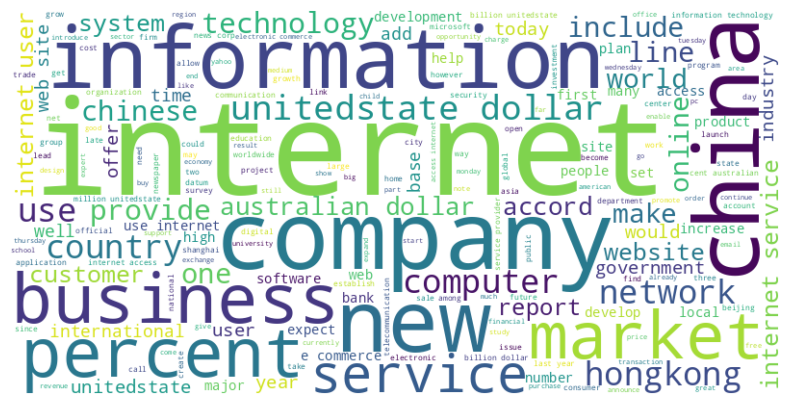

In [72]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# load csv and generate word cloud
def generate_wordcloud_from_tokens(file_path, tokens_column, custom_stopwords=None):
    # load csv
    df = pd.read_csv(file_path)
    
    # read tokens column
    text = ' '.join(df[tokens_column].dropna().astype(str))
    
    # remove punctuations
    text = text.replace("'", "").replace("[", "").replace("]", "")
    
    # customize stopwords
    if custom_stopwords is None:
        custom_stopwords = set()
    else:
        custom_stopwords = set(custom_stopwords)  
    
    # generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          max_words=200, stopwords=custom_stopwords).generate(text)
    
    # show word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.show()

# main
def main():
    input_file = 'C:/Users/70794/news/internet_cn_tokens.csv'  
    tokens_column = 'tokens'  
    
    custom_stopwords = ['say', 'also'] 
    
    generate_wordcloud_from_tokens(input_file, tokens_column, custom_stopwords)

if __name__ == '__main__':
    main()


In [33]:
import tomotopy as tp
import little_mallet_wrapper

# Download NLTK resources if not already present
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define custom stopwords
custom_stopwords = set(['say', 'would', 'one', 'use', 'make', 'like', 'also', 'go', 'get', 'take', 'could'])

# Combine NLTK stopwords with custom stopwords
combined_stopwords = set(stopwords.words('english')).union(custom_stopwords)

# Create lists for the data
training_data = []
original_texts = []
titles = []

# Define a function to clean and preprocess text
def preprocess_text(tokens, title):
    # Join list of tokens into a single string
    if isinstance(tokens, list):
        text = ' '.join(tokens)
    else:
        text = str(tokens)

    # Remove everything unnecessary using little_mallet_wrapper
    processed_text = little_mallet_wrapper.process_string(
        text,
        numbers='remove',
        lowercase=True,
        remove_stop_words=True,
        remove_punctuation=True,
        stop_words=list(combined_stopwords)  # Use the combined stopwords list
    )
    
    # Lemmatize the processed text
    lemmatized_tokens = ' '.join([lemmatizer.lemmatize(word) for word in processed_text.split()])

    # Add the cleaned data into the lists
    training_data.append(lemmatized_tokens)
    original_texts.append(text)
    titles.append(title)

df.apply(lambda x: preprocess_text(x['tokens'], x['id']), axis=1)

print("Custom stopwords have been added successfully.")

model = tp.LDAModel(k=10)  # Adjust the number of topics as needed

# Add processed documents to the model
for text in training_data:
    model.add_doc(text.split())  # Ensure each text is split into tokens

# Train the model
model.train(1000)  # Number of iterations can be adjusted


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\70794\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\70794\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Custom stopwords have been added successfully.
Most relevant topics have been saved successfully.


In [114]:

# range of topics range(4:19)
# return the amount of topics trained and the average coherence for the model

def model_adjusting(training_data, amount):
    coherences =[]
    for num in amount:
        
        # Intialize the model with the topics
        model = tp.LDAModel(k=num)
        
        # Add each document to the model, after splitting it up into words
        for tweet in training_data:
            model.add_doc(tweet.strip().split())
            
        # Train the model   
        iterations = 10
        for i in range(0, 100, iterations):
            model.train(iterations)
            
        # Get coherence
        coh = tp.coherence.Coherence(model, coherence='c_v')
        average_coherence = coh.get_score()
        coherences.append(average_coherence)

        # Print coherence resuls
        print('\n==== Coherence : {} ===='.format('c_v'))
        print('Average:', average_coherence, '\nAmount of Topics:', num)
        
    # Plot results
    
    plt.plot(amount, coherences)


==== Coherence : c_v ====
Average: 0.6788521376252173 
Amount of Topics: 5

==== Coherence : c_v ====
Average: 0.6204497488836448 
Amount of Topics: 6

==== Coherence : c_v ====
Average: 0.6109144609887153 
Amount of Topics: 7

==== Coherence : c_v ====
Average: 0.5747479791752995 
Amount of Topics: 8

==== Coherence : c_v ====
Average: 0.6189790310752061 
Amount of Topics: 9

==== Coherence : c_v ====
Average: 0.6214134948246647 
Amount of Topics: 10

==== Coherence : c_v ====
Average: 0.5631361940960316 
Amount of Topics: 11

==== Coherence : c_v ====
Average: 0.5861854411661624 
Amount of Topics: 12

==== Coherence : c_v ====
Average: 0.5954697050010929 
Amount of Topics: 13

==== Coherence : c_v ====
Average: 0.5957439465647828 
Amount of Topics: 14

==== Coherence : c_v ====
Average: 0.5919416383281351 
Amount of Topics: 15

==== Coherence : c_v ====
Average: 0.5991795688576531 
Amount of Topics: 16

==== Coherence : c_v ====
Average: 0.5701485548058853 
Amount of Topics: 17

===

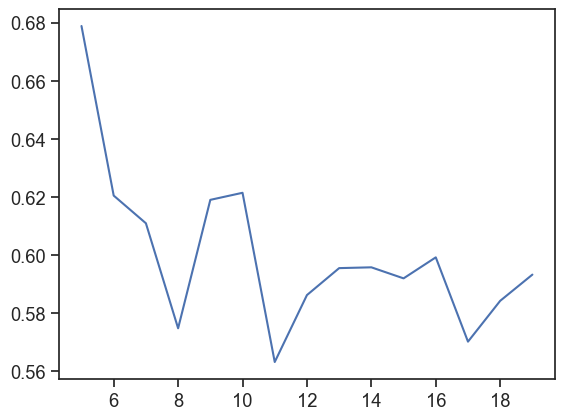

In [115]:
model_adjusting(training_data, range(5,20))

In [116]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.62471720026806 
Per Topic: [0.5419120982289314, 0.6036597043275833, 0.881367701292038, 0.6878394037485123, 0.408974751830101, 0.6441331148147583, 0.6266981409862638, 0.4682200729846954, 0.7328482866287231, 0.6515187278389931]



In [103]:

# Create a list to store the most relevant topic for each document
most_relevant_topics = []

# Get topic distributions for each document and find the most relevant topic
for text in training_data:
    topic_dist, _ = model.infer(model.make_doc(text.split()))
    most_relevant_topic = topic_dist.argmax()  # Get the index of the most relevant topic
    most_relevant_topics.append(most_relevant_topic)

# Create a DataFrame with ID and the most relevant topic
results_df = pd.DataFrame({
    'id': range(1, len(most_relevant_topics) + 1),  # ID from 1 to N
    'topic': most_relevant_topics  # Most relevant topic index for each document
})

# Save results to a CSV file
results_df.to_csv('document_most_relevant_topics_cn.csv', index=False)

print("Most relevant topics have been saved successfully.")


Most relevant topics have been saved successfully.


In [101]:

# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

# Create lists to save the topics and words
topics = []
topic_individual_words = []

for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

unitedstate dollar market internet business billion company million year commerce

✨Topic 1✨

site web world news internet information chinese people page provide

✨Topic 2✨

dollar australian cent point index stock share million close rise

✨Topic 3✨

technology hongkong internet information world country development university education government

✨Topic 4✨

internet government child law minister report year national international hke

✨Topic 5✨

internet company new computer information business software service technology access

✨Topic 6✨

internet percent user million computer number year survey people home

✨Topic 7✨

bank service customer banking electronic card security financial online stock

✨Topic 8✨

china information internet chinese network website year city country beijing

✨Topic 9✨

service internet telecom company telecommunication phone provider line telephone new



In [19]:

# Load the existing results DataFrame (make sure the path is correct)
results_df = pd.read_csv('document_most_relevant_topics.csv')

# Define the mapping of topic indices to types
topic_type_mapping = {
    0: 'economy',
    1: 'culture',
    2: 'economy',
    3: 'culture',
    4: 'policy',
    5: 'economy',
    6: 'inequality',
    7: 'economy',
    8: 'economy',
    9: 'economy'
}

# Create a new column 'type' by mapping the 'topic' values
results_df['type'] = results_df['topic'].map(topic_type_mapping)

# Save the updated DataFrame to a new CSV file
results_df.to_csv('document_most_relevant_topics_with_type_cn.csv', index=False)

print("Updated DataFrame with types has been saved successfully.")


Updated DataFrame with types has been saved successfully.


In [20]:

# Merge the DataFrames on 'id'
merged_df = pd.merge(df, results_df, how='left', left_on='id', right_on='id')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('internet_cn_tokens_topic.csv', index=False)

In [21]:
df = merged_df

In [22]:
df.head(20)

,id,title,body,day,year,month,lemma,tokens,topic,type
0,1,COPYRIGHT 1999 XINHUA NEWS AGENCY,A SURVEY RELEASED THURSDAY BY DELL COMPUTER ...,24,1999,12,a survey release THURSDAY by DELL COMPUTER ...,"['survey', 'release', 'thursday', 'dell', 'com...",5,economy
1,2,MEE122302HKE -- JORDAN LIBERALIZES OPENING OF ...,THE JORDANIAN GOVERNMENT HAS LIBERALIZED THE...,23,1999,12,the jordanian GOVERNMENT have liberalized t...,"['jordanian', 'government', 'liberalized', 'pr...",6,inequality
2,3,COPYRIGHT 1999 XINHUA NEWS AGENCY,"AS THE NEW MILLENNIUM'S DAY APPROACHES, MANY...",22,1999,12,"as the NEW MILLENNIUM 's DAY APPROACHES , m...","['new', 'millennium', 'day', 'approaches', 'ma...",6,inequality
3,4,SMALLER U.S. COMPANIES LAG BEHIND BIG COUNTERP...,A NEW SURVEY RELEASED WEDNESDAY FOUND THAT 2...,22,1999,12,a new survey release WEDNESDAY find that 23...,"['new', 'survey', 'release', 'wednesday', 'fin...",0,economy
4,5,COPYRIGHT 1999 XINHUA NEWS AGENCY,ONLINE SECURITIES TRADING BY PRIVATE INVESTO...,21,1999,12,ONLINE security trading by private INVESTOR...,"['online', 'security', 'trading', 'private', '...",0,economy
5,6,ONLINE TRAVEL SITES ATTRACT MILLIONS OF AMERICANS,ONLINE TRAVEL SITES HAVE ATTRACTED MILLIONS ...,18,1999,12,ONLINE travel site have attract MILLIONS of...,"['online', 'travel', 'site', 'attract', 'milli...",6,inequality
6,7,COPYRIGHT 1999 XINHUA NEWS AGENCY,NINE IN 10 AMERICAN HOMES WILL BE ONLINE IN ...,16,1999,12,nine in 10 AMERICAN HOMES will be online in...,"['nine', '10', 'american', 'homes', 'online', ...",0,economy
7,8,WAL-MART REACHES DEAL WITH AOL TO BUILD INTERN...,"WAL-MART, THE unitedstates LARGEST RETAILER,...",16,1999,12,"WAL - MART , the unitedstate LARGEST RETAIL...","['wal', 'mart', 'unitedstate', 'largest', 'ret...",0,economy
8,9,COPYRIGHT 1999 XINHUA NEWS AGENCY,A REPORT RELEASED TUESDAY PROJECTS THAT THE ...,15,1999,12,a report release tuesday project that the u...,"['report', 'release', 'tuesday', 'project', 'u...",0,economy
9,10,COPYRIGHT 1999 XINHUA NEWS AGENCY,unitedstates STANFORD UNIVERSITY IS OPENING ...,14,1999,12,unitedstate STANFORD UNIVERSITY be open a n...,"['unitedstate', 'stanford', 'university', 'ope...",3,culture


C:\Users\70794\AppData\Local\Temp\ipykernel_98848\2420945410.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout


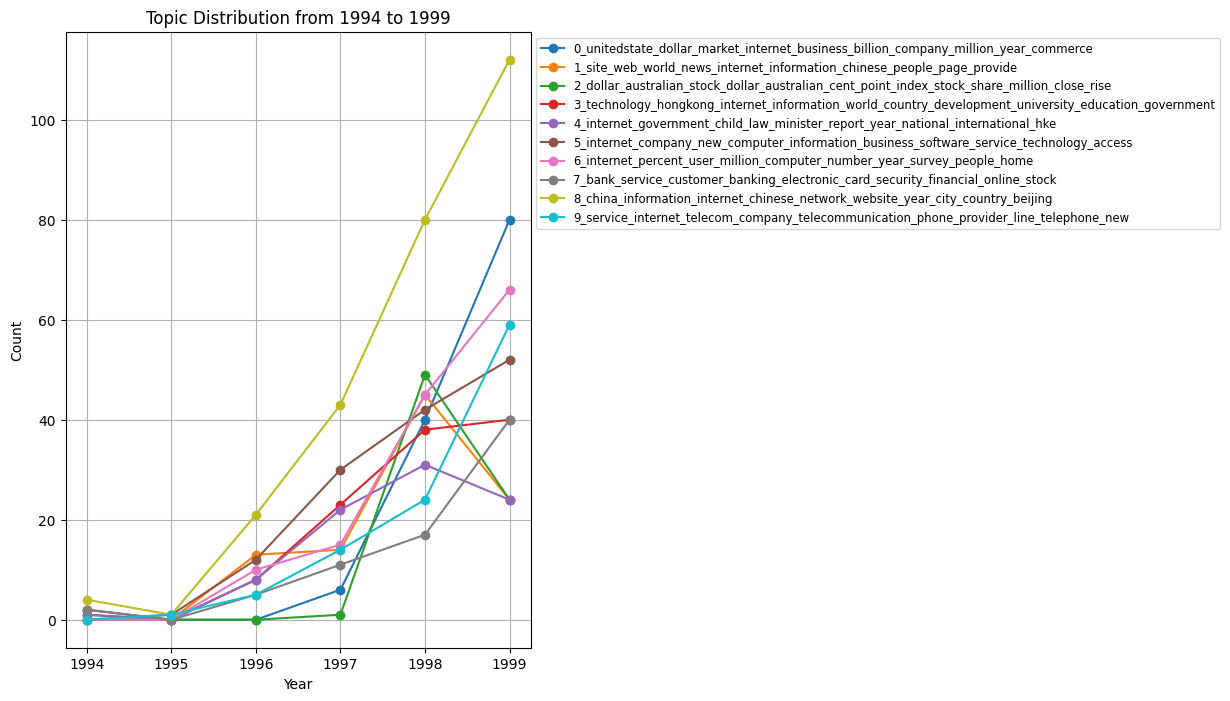

In [23]:
# Calculate the count of each topic for each year
topic_distribution = df.groupby(['year', 'topic']).size().unstack(fill_value=0)

# Define custom line names and corresponding words
topic_names_with_words = {
    0: '0_unitedstate_dollar_market_internet_business_billion_company_million_year_commerce',
    1: '1_site_web_world_news_internet_information_chinese_people_page_provide',
    2: '2_dollar_australian_stock_dollar_australian_cent_point_index_stock_share_million_close_rise',
    3: '3_technology_hongkong_internet_information_world_country_development_university_education_government',
    4: '4_internet_government_child_law_minister_report_year_national_international_hke',
    5: '5_internet_company_new_computer_information_business_software_service_technology_access',
    6: '6_internet_percent_user_million_computer_number_year_survey_people_home',
    7: '7_bank_service_customer_banking_electronic_card_security_financial_online_stock',
    8: '8_china_information_internet_chinese_network_website_year_city_country_beijing',
    9: '9_service_internet_telecom_company_telecommunication_phone_provider_line_telephone_new',
}

# Plot the line chart
plt.figure(figsize=(6, 8))  # Adjust the figure size to fit the text
for topic in topic_distribution.columns:
    plt.plot(topic_distribution.index, topic_distribution[topic], marker='o', label=topic_names_with_words.get(topic, f'Topic {topic}'))

plt.title('Topic Distribution from 1994 to 1999')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(topic_distribution.index)  # Ensure the years are ticks on the x-axis

# Adjust legend position
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')  # Place the legend on the right side
plt.grid()
plt.tight_layout()  # Adjust layout
plt.show()


In [14]:
year_topic_counts = df.groupby(['year', 'topic']).size().reset_index(name='Count')

print(year_topic_counts)

    year  topic  Count
0   1994      0      1
1   1994      3      2
2   1994      4      1
3   1994      7      2
4   1994      8      4
5   1995      5      1
6   1995      8      1
7   1995      9      1
8   1996      1     13
9   1996      3      8
10  1996      4      8
11  1996      5     12
12  1996      6     10
13  1996      7      5
14  1996      8     21
15  1996      9      5
16  1997      0      6
17  1997      1     14
18  1997      2      1
19  1997      3     23
20  1997      4     22
21  1997      5     30
22  1997      6     15
23  1997      7     11
24  1997      8     43
25  1997      9     14
26  1998      0     40
27  1998      1     45
28  1998      2     49
29  1998      3     38
30  1998      4     31
31  1998      5     42
32  1998      6     45
33  1998      7     17
34  1998      8     80
35  1998      9     24
36  1999      0     80
37  1999      1     24
38  1999      2     24
39  1999      3     40
40  1999      4     24
41  1999      5     52
42  1999   

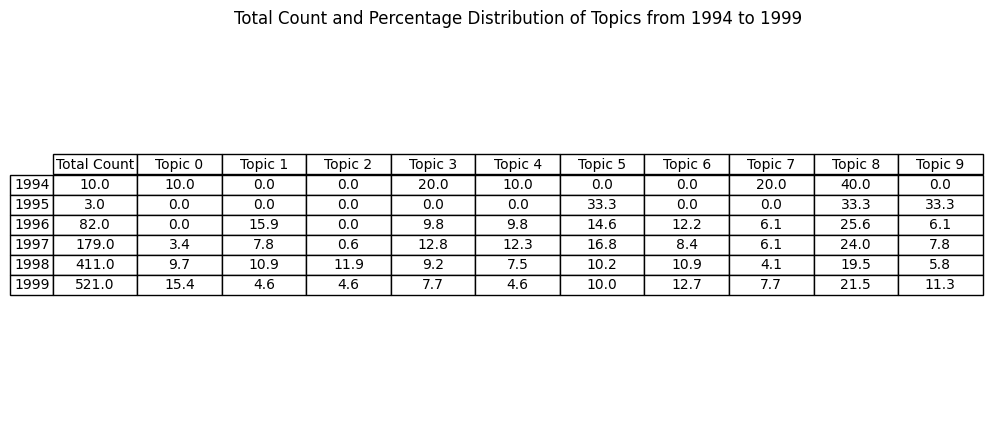

In [9]:
percentage_distribution = topic_distribution.div(topic_distribution.sum(axis=1), axis=0) * 100
total_count_per_year = topic_distribution.sum(axis=1)

# Plot total count and percentage table
fig, ax = plt.subplots(figsize=(10, 5))  # Create a new figure for the table
ax.axis('tight')
ax.axis('off')

# Create the total count and percentage table
combined_table_data = pd.DataFrame({
    'Total Count': total_count_per_year,
    **{f'Topic {topic}': percentage_distribution[topic].round(1) for topic in percentage_distribution.columns}
})

# Display in the table
table = ax.table(cellText=combined_table_data.values,
                 colLabels=combined_table_data.columns,
                 rowLabels=combined_table_data.index,
                 cellLoc='center', 
                 loc='center')
table.auto_set_font_size(False)  # Turn off automatic font size adjustment
table.set_fontsize(10)  # Set font size
table.scale(1.2, 1.2)  # Adjust table size

plt.title('Total Count and Percentage Distribution of Topics from 1994 to 1999')
plt.show()


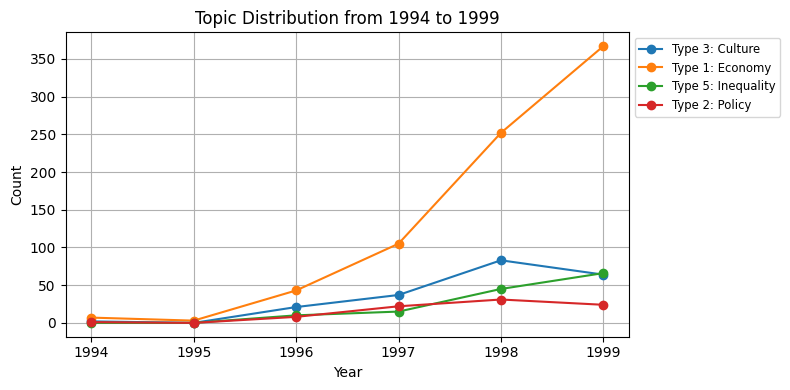

In [5]:
file_path = 'internet_cn_tokens_topic.csv'
df = pd.read_csv(file_path)

# Filter years
filtered_df = df[(df['year'] >= 1994) & (df['year'] <= 1999)]

# Calculate the count of each topic for each year
topic_distribution = filtered_df.groupby(['year', 'type']).size().unstack(fill_value=0)

# Define custom line names and corresponding words
topic_names_with_words = {
    'economy': 'Type 1: Economy',
    'policy': 'Type 2: Policy',
    'culture': 'Type 3: Culture',
    'community' : 'Type 4: Community',
    'inequality' : 'Type 5: Inequality'
}

# Plot the line chart
plt.figure(figsize=(8, 4))  # Adjust the figure size to fit the text
for topic in topic_distribution.columns:
    plt.plot(topic_distribution.index, topic_distribution[topic], marker='o', label=topic_names_with_words.get(topic, f'Topic {topic}'))

plt.title('Topic Distribution from 1994 to 1999')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(topic_distribution.index)  # Ensure the years are ticks on the x-axis

# Adjust legend position
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')  # Place the legend on the right side
plt.grid()
plt.tight_layout()  # Adjust layout
plt.savefig("line_cn_type.jpg")
plt.show()


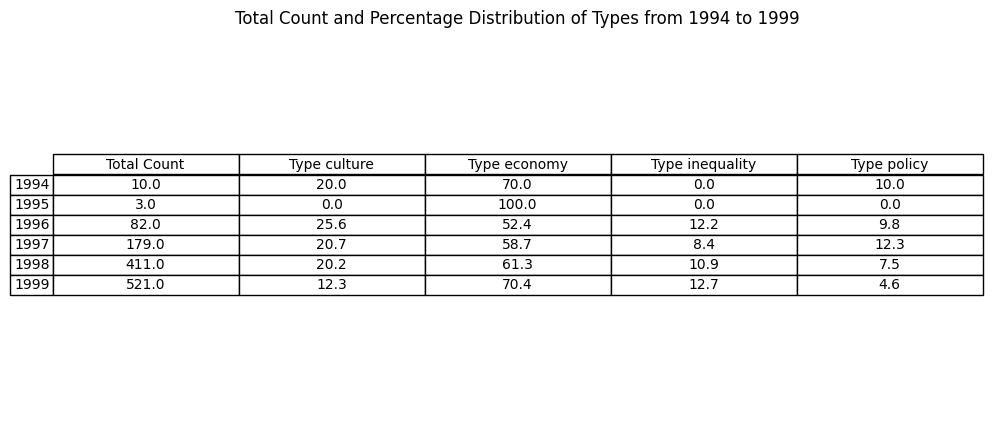

In [25]:
total_count_per_year = topic_distribution.sum(axis=1)

# Calculate the count of each type for each year
type_distribution = filtered_df.groupby(['year', 'type']).size().unstack(fill_value=0)

# Calculate the percentage of each type for each year
percentage_distribution = type_distribution.div(type_distribution.sum(axis=1), axis=0) * 100

# Plot total count and percentage table
fig, ax = plt.subplots(figsize=(10, 5))  # Create a new figure for the table
ax.axis('tight')
ax.axis('off')

# Create the total count and percentage table
combined_table_data = pd.DataFrame({
    'Total Count': total_count_per_year,
    **{f'Type {t}': percentage_distribution[t].round(1) for t in percentage_distribution.columns}
})

# Display in the table
table = ax.table(cellText=combined_table_data.values,
                 colLabels=combined_table_data.columns,
                 rowLabels=combined_table_data.index,
                 cellLoc='center', 
                 loc='center')
table.auto_set_font_size(False)  # Turn off automatic font size adjustment
table.set_fontsize(10)  # Set font size
table.scale(1.2, 1.2)  # Adjust table size

plt.title('Total Count and Percentage Distribution of Types from 1994 to 1999')
plt.show()


In [77]:
filtered_data_8 = df[df['topic'] == 8]

In [78]:
filtered_data_0 = df[df['topic'] == 0]

In [79]:
filtered_data_1 = df[df['topic'] == 1]

In [80]:
filtered_data_2 = df[df['topic'] == 2]

In [81]:
filtered_data_3 = df[df['topic'] == 3]

In [82]:
filtered_data_4 = df[df['topic'] == 4]

In [83]:
filtered_data_5 = df[df['topic'] == 5]

In [84]:
filtered_data_6 = df[df['topic'] == 6]

In [85]:
filtered_data_7 = df[df['topic'] == 7]

In [86]:
filtered_data_9 = df[df['topic'] == 9]

In [91]:

from nltk.probability import FreqDist
import string

# Ensure that the NLTK stopwords are downloaded
nltk.download('stopwords')

# Get NLTK stopwords
nltk_stopwords = set(stopwords.words('english'))

# Define custom stopwords
custom_stopwords = ['say', 'would', 'one', 'use', 'make', 'like', 'also', 'go', 'get', 'take', 'could']  # More custom stopwords can be added

# Combine stopwords list
combined_stopwords = nltk_stopwords.union(custom_stopwords)

# Define punctuation
punctuation = set(string.punctuation)

# Calculate the top 20 most common words for each DataFrame
for i in range(10):
    df_name = f'filtered_data_{i}'  # Dynamically generate DataFrame name
    df = eval(df_name)  # Use eval to get the corresponding DataFrame
    
    # Get the 'lemma' column, remove stopwords and punctuation, and convert to lowercase
    words = df['lemma'].dropna().astype(str).apply(lambda x: x.lower())  # Convert to lowercase
    filtered_words = [word for word in " ".join(words).split() 
                      if word not in combined_stopwords and word not in punctuation]
    
    # Use FreqDist to calculate word frequency
    freq_dist = FreqDist(filtered_words)
    
    # Get the top 20 most common words
    most_common_words = freq_dist.most_common(20)
    
    # Output results
    print(f"Top 20 most common words in {df_name}:")
    for word, frequency in most_common_words:
        print(f"{word}: {frequency}")
    print("\n")  # Separate results of each DataFrame with a blank line


Top 20 most common words in filtered_data_0:
internet: 483
dollar: 394
unitedstate: 352
percent: 330
billion: 266
market: 241
year: 237
million: 231
business: 224
company: 218
commerce: 204
online: 196
's: 178
report: 170
service: 154
web: 140
accord: 139
e: 133
firm: 117
growth: 110


Top 20 most common words in filtered_data_1:
internet: 250
's: 161
site: 155
web: 146
world: 140
information: 138
china: 131
chinese: 124
provide: 73
people: 73
user: 69
news: 68
hongkong: 67
website: 59
first: 58
year: 54
service: 54
new: 52
launch: 49
million: 45


Top 20 most common words in filtered_data_2:
dollar: 527
cent: 490
australian: 433
point: 310
index: 287
stock: 210
share: 206
million: 204
close: 199
unitedstate: 196
rise: 189
bank: 172
market: 170
news: 160
corp: 156
's: 154
percent: 150
fall: 141
national: 120
high: 119


Top 20 most common words in filtered_data_3:
internet: 429
technology: 217
information: 205
hongkong: 174
's: 169
world: 143
country: 139
development: 129
computer: 105

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\70794\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:

# Get stopwords
stop_words = set(stopwords.words('english'))

# Initialize a Counter to count word frequency
word_counts = Counter()

# Iterate through each row, tokenize, and remove stopwords
for text in df['lemma']:
    if isinstance(text, str):  # Ensure the text is a string
        # Tokenize
        words = word_tokenize(text.lower())  # Convert text to lowercase
        # Filter out stopwords
        filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
        # Update word frequency count
        word_counts.update(filtered_words)

# Get the top 50 most common words and their counts
most_common_words = word_counts.most_common(50)

# Output results
for word, count in most_common_words:
    print(f'{word}: {count}')


internet: 4137
say: 2635
information: 1522
service: 1450
china: 1387
percent: 1341
dollar: 1324
unitedstate: 1215
million: 1130
company: 1124
year: 1087
use: 858
business: 853
new: 843
technology: 837
market: 836
user: 784
world: 779
computer: 778
web: 742
also: 714
network: 697
line: 639
country: 627
accord: 606
one: 601
report: 601
chinese: 589
access: 586
online: 576
hongkong: 571
provide: 570
site: 549
e: 524
australian: 510
cent: 501
make: 477
people: 477
commerce: 477
bank: 469
high: 467
first: 466
government: 462
today: 461
billion: 452
news: 452
electronic: 434
number: 423
development: 409
international: 400


In [113]:
model.save('lda_model_cn.bin') 


In [13]:
file_path = 'internet_cn_tokens_topic.csv' 
import pandas as pd


In [14]:
# read csv as df
df = pd.read_csv(file_path, delimiter=',')


In [10]:
for k, model in models.items():
    print(f"Calculating coherence for {k} topics...")
    topic_coherence = []
    for topic_id in range(model.k):
        top_words = [word for word, _ in model.get_topic_words(topic_id, top_n=10)]
        coherence_score = 0
        for i, word1 in enumerate(top_words):
            for word2 in top_words[i + 1:]:
                cooccurrence_count = cooccurrence.get((word1, word2), 0)
                coherence_score += np.log((cooccurrence_count + 5) / word_count[word1]) 
        coherence_score /= len(top_words) * (len(top_words) - 1) / 2  # 归一化
        topic_coherence.append(coherence_score)
    
    avg_coherence = np.mean(topic_coherence)
    print(f"Average Coherence Score for {k} topics: {avg_coherence:.4f}")


Calculating coherence for 5 topics...
Average Coherence Score for 5 topics: -0.6078
Calculating coherence for 10 topics...
Average Coherence Score for 10 topics: -0.9205
Calculating coherence for 15 topics...
Average Coherence Score for 15 topics: -1.0510
Calculating coherence for 20 topics...
Average Coherence Score for 20 topics: -1.1361
Calculating coherence for 25 topics...
Average Coherence Score for 25 topics: -1.2600
